In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
from fastai.text.all import *
from fastai.tabular.all import *
from fastai.collab import *
import ipywidgets as widgets
from IPython.display import display
import os
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch


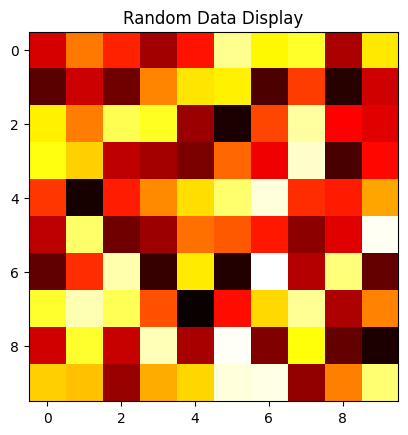

In [15]:
# code snippets for experimentation
# display data as an image; 
# convert a 2D numpy array into a visual image

# generate some random data
data = np.random.rand(10,10) 

# Display the data as an image
plt.imshow(data,cmap='hot', interpolation='nearest')

plt.title("Random Data Display")

# plt.show() is necessary if you're running this in a Python script to render the plot
plt.show()

In [16]:
# How to calculate a gradient

# define the function
def f(x): return x**2

# create a tensor with requires_grad=True
x = torch.tensor(3.0, requires_grad=True)

# compute the function value
y = f(x)

# compute the gradient
y.backward()

# access the gradient
gradient = x.grad

print(f"Gradient of f(x) = x^2 at x = {x.item()} is {gradient.item()}")

Gradient of f(x) = x^2 at x = 3.0 is 6.0


In [17]:
# Apply a Learning Rate
# stepping your parameters

# define a function
def h(x): return x**2

# create a tensor with requires_grad=True
# use an initial value of 3.0
x = torch.tensor(3.0, requires_grad=True)

# define the learning rate
learning_rate = 0.1

# perform a single gradient descent step
# do 10 iterations 
for i in range (10):
    y = h(x)
    y.backward() # compute the gradient using backpropagation
    
    # update x using the gradient and learning rate
    with torch.no_grad(): # temporarily set requires_grad to False
        x -= learning_rate * x.grad
    
    # zero the gradients after updating
    x.grad.zero_()
    
    print(f"Iteration {i+1}: x = {x.item()}")

# final value of x
print(f"Final value x: {x.item()}")

Iteration 1: x = 2.4000000953674316
Iteration 2: x = 1.9200000762939453
Iteration 3: x = 1.5360000133514404
Iteration 4: x = 1.2288000583648682
Iteration 5: x = 0.9830400347709656
Iteration 6: x = 0.7864320278167725
Iteration 7: x = 0.629145622253418
Iteration 8: x = 0.5033165216445923
Iteration 9: x = 0.40265321731567383
Iteration 10: x = 0.32212257385253906
Final value x: 0.32212257385253906


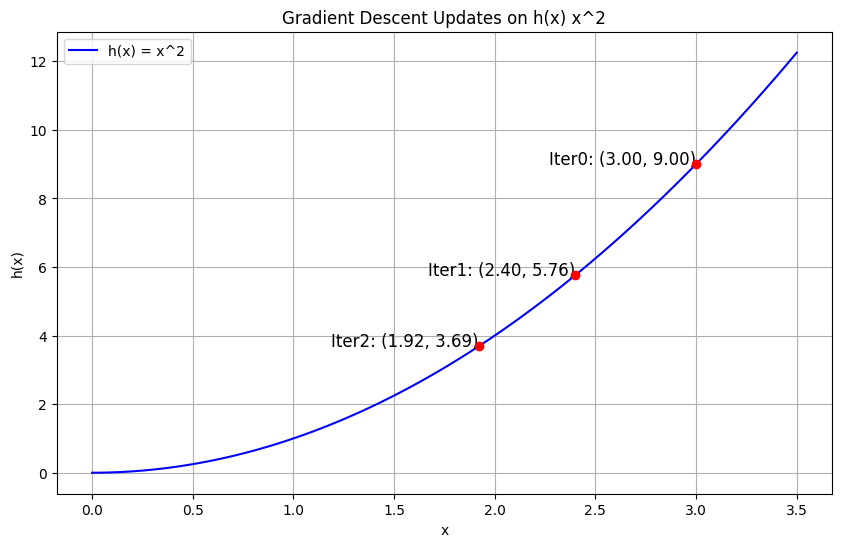

In [18]:
def h(x): return x**2
x_values = [3.0, 2.4, 1.92]
y_values = [h(x) for x in x_values]

# plot the functiion
x_range = np.linspace(0, 3.5,100)
y_range = h(x_range)

plt.figure(figsize=(10,6))
plt.plot(x_range, y_range, label='h(x) = x^2', color='blue')
plt.scatter(x_values, y_values, color='red',zorder=5)
for i, (x,y) in enumerate(zip(x_values, y_values)):
    plt.text(x,y, f'Iter{i}: ({x:.2f}, {y:.2f})', fontsize=12, ha='right')
plt.title('Gradient Descent Updates on h(x) x^2')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.grid(True)
plt.show()

8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375
8583.0224609375


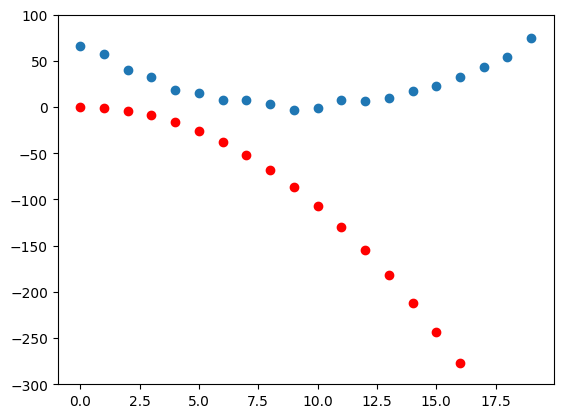

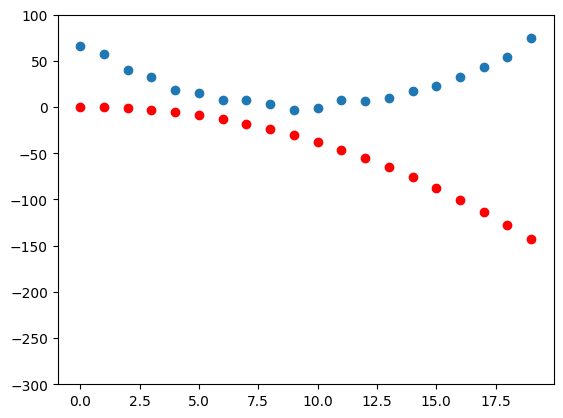

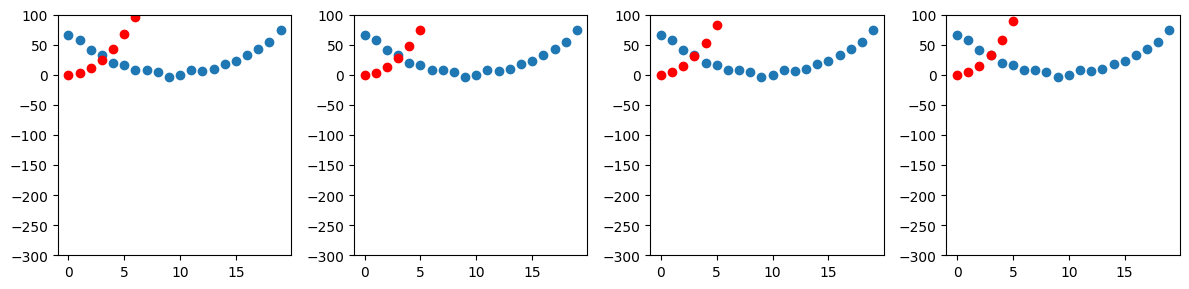

In [2]:
# Goal: Build an End-to-End SGD Example 
# model the speed of a roller coaster as it went over the top of a hump

# create the time tensor with values from 0 to 19 (inclusive)
time = torch.arange(0,20).float()

# generate the speed tensor
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

# make a scatter plot of the roller coaster speed
# plt.scatter(time,speed)


# collect the parameters into one argument
# find the best quadratic
def f(t, params):
    a, b, c = params 
    return a*(t**2) + (b*t) + c

# apply SGD to minimize loss
# for continuous data use the mean squared error 
def mse(pred, targets): return ((preds - targets)**2).mean()


# step 1: initialize the parameters
params = torch.randn(3).requires_grad_()

# step 2: calculate the predictions
preds = f(time,params)
def show_preds(preds, ax=None):
    if ax is None: 
        ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

# step 3: calculate the loss
loss = mse(preds, speed)

# step 4: calculate the gradients
# calculate an approximation of how the parameters need to change
loss.backward()
params.grad

# now apply a learning rate of 1e-5
params.grad * 1e-5
params

# step 5: step the weights
# update the parameters based on the gradients we just calculated
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

# now see if the loos has improved
preds = f(time, params)
mse(preds, speed)

show_preds(preds)

# step 6: repeat the process
# We need to repeat this a few times, so we'll create a function to apply one step
# def apply_step(params, prn=True):
#     preds = f(time, params)
#     loss = mse(preds, speed)
#     loss.backward()
#     params.data -= lr * params.grad.data
#     params.grad = None
#     if prn: print(loss.item())
#     return preds
     
# for i in range(10): apply_step(params)

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward(retain_graph=True)  # Retain the computation graph
    with torch.no_grad():
        params.data -= lr * params.grad
    params.grad.zero_()
    if prn: print(loss.item())
    return preds

for i in range(10): apply_step(params)

    
# intermediate goal: find a function to fit the model
# step 6 (continued): display the interations
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Training Process and Stochastic Gradient Descent (SGD) ##
# Goal complete: Build an End-to-End SGD Example 
# Step 7: stop
# We just decided to stop after 10 epochs arbitrarily. 
# In practice, the training and validation losses and metrics decide when to stop

In [3]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# first step
# create a quadratic function
def quad(a,b,c,x): return a*x**2 + b*x + c

# pass in coefficients 3,2,1 and x = 1.5 into the function
quad(3,2,1, 1.5)

10.75

In [4]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# next step: use the partial method from functools to build a more robust function

# The partial method in the functools module is used to fix a certain number of arguments of a function and generate a new function. 
# This can be particularly useful when you need to repeatedly call a function with some of the same arguments.
from functools import partial

# fucntion to create a partial appication of a function but fix the values of the function
def make_quad(a,b,c): return partial(quad, a,b,c)

In [5]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

## next step: create a quadratic with coefficients 3,2,1 that are fixed
## so now all we have to do is pass in the value of x (this is better than the first function and yields the same result)
f = make_quad(3,2,1)
f(1.5)


10.75

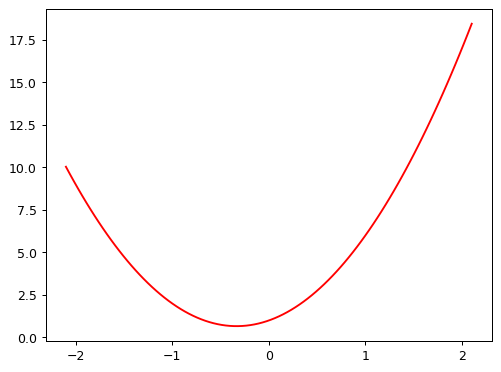

In [6]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# next step: plot the function

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

plot_function(f)

In [7]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

## next step: create some random noise in the shape of the function (particular method does not matter)
# normal: Used to generate random samples from a normal (Gaussian) distribution.
# seed: Used to seed the random number generator, which helps in reproducing the results.
# uniform: Used to generate random samples from a uniform distribution.
from numpy.random import normal, seed, uniform

# sets the seed for NumPy's random number generator to 42.
# Seeding the random number generator is important for reproducibility. 
# When you seed the generator with a specific value, the sequence of random numbers generated will be the same every time you run the code.
seed(42)

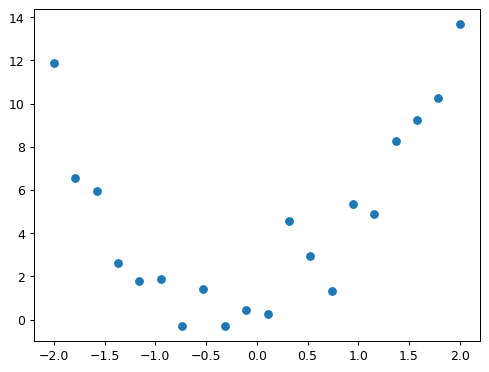

In [8]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

## next step: Generate noise with a scatter plot

# Generates a noise array with the same shape as x, sampled from a normal distribution with a given standard deviation scale.
def noise(x, scale): 
    return np.random.normal(scale=scale, size=x.shape)

#  Adds both multiplicative noise (with standard deviation mult) and additive noise (with standard deviation add) to the array x.
def add_noise(x, mult, add): 
    return x * (1 + noise(x, mult)) + noise(x, add)

# create a 1-dimensional tensor with 20 evenly spaced values between -2 and 2.
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

plt.scatter(x,y)

In [9]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

## initial mini-goal complete: create different quadratics to test them and determnie which one is best

# experiment with each coefficient on at a time to get the best fit
from ipywidgets import interact
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(make_quad(a,b,c), ylim=(-3,13))
    
# this is a simple way to experiment with parameters but real models have billions of parameters so we need a more efficient way
# next calculate the mean absolute error

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [12]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# next step: create the mean absolute error (MSE) 
# mean absolute error is the distance from each data point to the curve
# MSE determineS if the fit is better or worse 
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = make_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

# we are basically manually calculating the loss by moving the sliders
# as you adjust the coefficients see if the loss improves (decreases)

# next step: there is a to automate the gradient descent via the derivative

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [14]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# goal: automate gradient descent

# next step: create a tensor
# function takes the coefficient parameters a,b,and c then returns the loss (mae())
def quad_mae(params):
    f = make_quad(*params)
    return mae(f(x), y)

quad_mae([1.1, 1.1, 1.1])

tensor(2.4219, dtype=torch.float64)

In [16]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# goal: automate gradient descent

# next step: calculate the gradients for each parameter in the tensor
#  create a rank 1 tensor
abc = torch.tensor([1.1, 1.1, 1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [18]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# goal: automate gradient descent

# next step: calculate the loss
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [19]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# goal: automate gradient descent
# next step: calculate the gradient by calling backward()
# The gradients will be stored for us in an attribute called grad:
loss.backward()
abc.grad

# output
# tensor([-1.3529, -0.0316, -0.5000])

# ** interpretation of the results **
# According to these gradients, all our parameters are a little low. 
# if you...
# 1) increase 'a' the loss will go down
# 2) increase 'b' the loss will go down
# 3) increase 'c' the loss will go down

# next step: increase the parameters a bit

tensor([-1.3529, -0.0316, -0.5000])

In [20]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# goal: automate gradient descent

# next step: increase the parameters a bit
# subtract the gradien and multiply by a small number to improve the loss
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')



loss=2.40


In [21]:
## Lesson: Fitting a Function with Gradient Descent ##
# use a qudratic as an example

# Goal Complete: automate gradient descent
# next step: create a loop to itereate
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')


# output
# the loss keeps going down!!

step=0; loss=2.40
step=1; loss=2.36
step=2; loss=2.30
step=3; loss=2.21
step=4; loss=2.11
step=5; loss=1.98
step=6; loss=1.85
step=7; loss=1.72
step=8; loss=1.58
step=9; loss=1.46


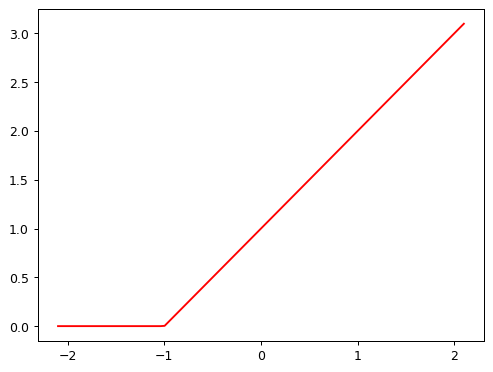

In [22]:
## Lesson: How a neural network approximates any given function ##

# A neural network is a very expressive function. It is infinitely expressive.
# A neural network can approximate any computable function, give enough parameters
# Requires two steps:
# 1 Matrix multiplication
# 2 The function max(x,0), which replaces all negative numbers with zero. 

# next step: create a rectified linear function
# calculate the output of a line
# any number < 0 will return 0
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

# graph the function
plot_function(partial(rectified_linear, 1,1))

In [25]:
## Lesson: How a neural network approximates any given function ##
# next step: make the plot function interactive
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))
    
# This does not do much but what happens when we add two of them together?

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [26]:
## Lesson: How a neural network approximates any given function ##
# next step: add two function together
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…